In [1]:
import time
import copy
import math

import cv2
import imutils
from matplotlib import pyplot as plt
import os


import iros_vision_tools as ivt
import iros_vision_functions as ivfunc

In [2]:
#ivt.check_camera()

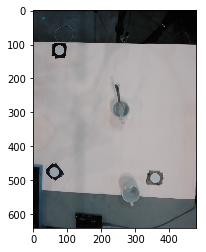

In [3]:
cali_img = ivt.capture_pic(1, 3)
plt.imshow(cali_img)
plt.show()

{'radius': [13, 16], 'thresh': [120, 200]}
COUNTERR:  70
Separation from original circles:  [[ 358.31411743]]
[  61.5         475.5          13.72953033]
[[ True]]
IT IS A COMPLETELY SEPARATE CIRCLE
COUNTERR:  88
Separation from original circles:  [[ 468.00106812  295.4894104 ]]
[ 356.5         492.5          14.71393871]
[[ True  True]]
IT IS A COMPLETELY SEPARATE CIRCLE
[  76.5         117.5          13.72953033]
[  61.5         475.5          13.72953033]
[ 356.5         492.5          14.71393871]
32
All Calibration points found


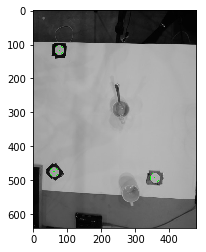

Change Calibration?: noo


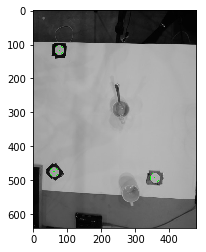

Change Calibration?: no
(1, 3, 3)
CALI_CIRCLES [[0.0, 0.0], [-15.0, 358.0], [280.0, 375.0]]


In [4]:
#cali_img = ivt.black_out(cali_img, [50,550,50,-1])

circles_sorted, crop_points = ivt.run_calibration(cali_img, adjust=True)
cali_circles_init = circles_sorted-circles_sorted[0][0]
cali_circles=[]
for circ in cali_circles_init[0]:
    cali_circles.append([circ[0], circ[1]])

print "CALI_CIRCLES", cali_circles

p1, inverse = ivt.pix3world_cal(cali_circles[0],cali_circles[2], cali_circles[1])

In [ ]:
CAMERA = 1

PATH_TO_TASK_IMAGES = "task_images"
task_img_1 = ivt.capture_pic(CAMERA,3)
cv2.imwrite(os.path.join(PATH_TO_TASK_IMAGES, 'task_img_1.jpg'), task_img_1)
crop_task_img_1 = ivt.crop_out(task_img_1, crop_points)
table_circles = ivfunc.cup_saucer(crop_task_img_1, show=True)
print "CROP_POINTS: ", crop_points
print "P1: ", p1
print "INVERSE", inverse

m_circle = table_circles["mug"]["circle"]
s_circle = table_circles["saucer"]["circle"]
print "m_circle: ", m_circle
print "s_circle: ", s_circle
mp = [m_circle[0], m_circle[1]]
mx,my = ivt.pix3world(p1, inverse, mp)
mx = mx[0,0]
my = my[0,0]

sp = [s_circle[0], s_circle[1]]
sx,sy = ivt.pix3world(p1, inverse, sp)
sx = sx[0,0]
sy = sy[0,0]

#vision stuff: get mug and saucer position
# mug and saucer centre positions
#mx,my,sx,sy = mug_saucer_pos

print "MX: ", mx
print "MY: ", my


In [ ]:
task_img_1 = ivt.capture_pic(CAMERA,3)
cv2.imwrite(os.path.join(PATH_TO_TASK_IMAGES, 'task_img_1.jpg'), task_img_1)
crop_task_img_1 = ivt.crop_out(task_img_1, crop_points)

In [ ]:
plt.imshow(crop_task_img_1)
plt.show()

In [ ]:
import numpy as np
-


crop_task_img_1 = ivt.crop_out(task_img_1, crop_points)
table_circles = cup_saucer2(crop_task_img_1, show=True)

In [ ]:
test_img = copy.copy(crop_task_img_1)
CAL_PARAM = {'thresh': [125, 160],
            'radius': [22,50]}
circles2, cimg = ivt.find_circles2(copy.copy(test_img), 2, param=CAL_PARAM, blur=1, overlap=True, 
                                       separation=180, show=True)

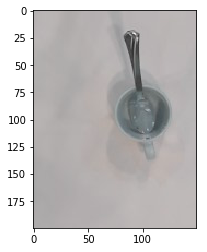

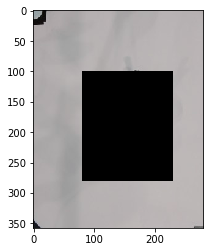

{'radius': [25, 35], 'thresh': [75, 100]}
[ 101.5          94.5          25.50490189]
20
All Calibration points found
('Object at #[[104  74]] REJECTED because BOX not big enough: ', 27)


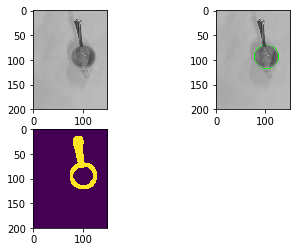

CIRCLE: [[[ 101.5          94.5          25.50490189]]]


In [7]:
CAMERA = 1
ROTATION = 3
PATH_TO_TASK_IMAGES = 'task_images'

task_img_3 = ivt.capture_pic(CAMERA,ROTATION)
cv2.imwrite(os.path.join(PATH_TO_TASK_IMAGES, 'task_img_3.jpg'), task_img_3)

crop_task_img_3 = ivt.crop_out(task_img_3, crop_points)

img_3a = crop_task_img_3[80:280, 80:230]
plt.imshow(img_3a)
#img_3b = ivt.black_out(copy.copy(crop_task_img_3), [180,-1,0,-1])
img_3b = copy.copy(crop_task_img_3)
img_3b[100:280, 80:230]=[0,0,0]
plt.figure()
plt.imshow(img_3b)
plt.show()

p_circle, spoon = ivfunc.find_spoon(img_3a, show=True)